In [2]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())
print("==========================================")
print(sm.OLS.from_formula("y ~ x + I(x**2)", data=df).fit().summary())
print("==========================================")
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())
print("==========================================")
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4)", data=df).fit().summary())
print("==========================================")
print(sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5)", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     25.20
Date:                Wed, 08 Jun 2016   Prob (F-statistic):           2.63e-05
Time:                        06:14:50   Log-Likelihood:                -20.253
No. Observations:                  30   AIC:                             44.51
Df Residuals:                      28   BIC:                             47.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5367      0.207      2.595      0.0

In [3]:
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))
Y = np.cos(1.5 * np.pi * X ) + np.random.randn(n_samples) * 0.1

dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfY = pd.DataFrame(Y, columns=["y"])
df = pd.concat([dfX,dfY],axis=1)

In [5]:
print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x ** 2)", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x ** 2) + I(x ** 3)" , data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x ** 2) + I(x ** 3) + I(x ** 4)", data=df).fit().summary())
print(sm.OLS.from_formula("y ~ x + I(x ** 2) + I(x ** 3) + I(x ** 4) + I(x ** 5)", data=df).fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     25.20
Date:                Wed, 08 Jun 2016   Prob (F-statistic):           2.63e-05
Time:                        06:21:25   Log-Likelihood:                -20.253
No. Observations:                  30   AIC:                             44.51
Df Residuals:                      28   BIC:                             47.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5367      0.207      2.595      0.0

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def polyreg(degree, seed=0, plot=True):
    polynomial_features = PolynomialFeatures(degree = degree)
    linear_regression = LinearRegression()
    model = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    Y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    
    model.fit(X,Y)
    
    if plot:
        plt. scatter(X,Y)
        xx = np.linspace(0, 1, 1000)
        plt.plot(xx, model.predict(xx[:, np.newaxis]))
        plt.ylim(-2, 2)
        plt.show()
        
    reg = model.named_steps["linear_regression"]
    return reg.coef_, reg.intercept_

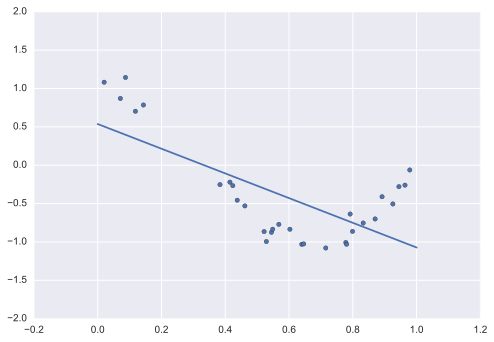

(array([ 0.        , -1.60931179]), 0.53668033031787343)

In [9]:
plt.subplot(251)
polyreg(1)
plt.subplot(252)
polyreg(2)

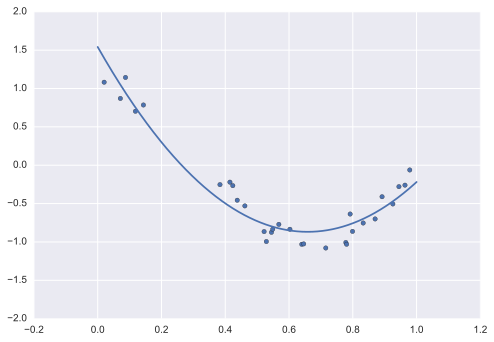

(array([ 0.        , -7.31956683,  5.55955392]), 1.5411486872392575)